# IMT 573 - Problem Set 6 - Statistical Learning

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Pratiibh Bassi

Collaborators: 

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

To gain some context for this problem set, read the below quote from [this paper](https://www.jstor.org/stable/41465842):

_Regression analysis, one of the most useful techniques in statistics, is applied in many disparate situations. It is used to explain the influence an independent variable may have on the variability of outcome variances. This technique serves us well not only in explaining variability, but also in projecting the future. The label regression survives, buts its backward connotation is too narrow to properly describe how the technique is used today. In fact, the name came about much later than the method itself, and was coined by Francis Galton in his study of eugenics. He was trying to explain data that showed that offspring of tall parents were, on average, not as tall as their parents, and, at the same time, the offspring of short parents were, on average, not as short as their parents, even though the generational average remained the same. This phenomenon, where the offspring might be viewed as tending toward the population average, is presently referred to as regression toward the mean,
although it started off as "regression to mediocrity". Galton explained this phenomenon in great detail in 1886, and it was later exemplified by a study that was the subject of a seminal paper by Karl Pearson and Alice Lee._

It must be noted that the study of eugenics and the optimization of human gene pools has since been deemed unscientific, unethical, and racially biased. It is not a focus for this problem set. 

Instead, we will focus on the phenomenon of genetic inheritance. Specifically, we will analyze the dataset of fathers' and sons' heights used by Pearson and Lee (as referenced in the quote above). It contains two variables, fathers' height and sons' height. If you take a simple mean, you see that on average sons are taller than fathers. But can this difference just be due to chance?

### Problem 1: Load and examine data

#### (a) Load the data

Load the data from the `fatherson.csv` file. Describe what you see in the data. Units aren't given for the columns - given your understanding of human height, what unit do you think the data uses? Are there any missing data or data that appear to be erroneous?

In [7]:
data = pd.read_csv("../Downloads/fatherson.csv")

In [9]:
data.head()

,fheight\tsheight
0,165.2\t151.8
1,160.7\t160.6
2,165\t160.9
3,167\t159.5
4,155.3\t163.3


In [15]:
data = pd.read_csv("../Downloads/fatherson.csv", delimiter = '\t')

In [17]:
data.head()

,fheight,sheight
0,165.2,151.8
1,160.7,160.6
2,165.0,160.9
3,167.0,159.5
4,155.3,163.3


In [19]:
data.shape

(1078, 2)

In [21]:
data.describe()

,fheight,sheight
count,1078.000000,1078.000000
mean,171.925232,174.457236
std,6.972346,7.150713
min,149.900000,148.600000
25%,167.100000,170.000000
50%,172.100000,174.300000
75%,176.800000,179.000000
max,191.600000,199.000000


There are two columns in the data - one for fathers' height and another for sons' height.  The heights appear to be in centimeter units.  There also does not appear to be any missing or erroneous data.

#### (b) Create density plots

Create a density plot of the data such that the distribution of fathers' and sons' heights are overlayed on the same plot. What do the distributions look like? What are the means and medians of the distributions?

C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


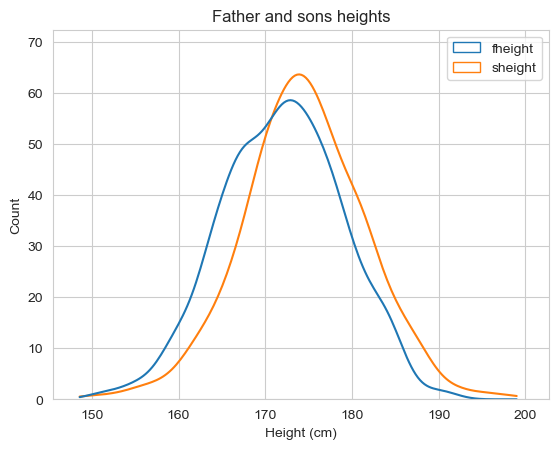

In [26]:
sns.set_style('whitegrid')

ax = sns.histplot(data = data, fill = False, kde = True, discrete = True)
ax.containers[0].remove()
ax.containers[0].remove()
ax.set_title('Father and sons heights')
ax.set_xlabel('Height (cm)');

In [28]:
data.mean(), data.median(), data.std()

(fheight    171.925232
 sheight    174.457236
 dtype: float64,
 fheight    172.1
 sheight    174.3
 dtype: float64,
 fheight    6.972346
 sheight    7.150713
 dtype: float64)

In [30]:
data.mean().diff()[1]

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\120723187.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.mean().diff()[1]


2.5320037105751396

The distributions have a fairly "normal-ish" shape to them. In general, the distribution of the sons' heights contains values slightly greater than that of fathers' heights, as can be seen from the means and the medians.

### Problem 2: Perform t-test

#### (a) Compute t-statistic

Is this difference statistically significant? Let’s do a t-test. Compute the t-statistic yourself - do not use any pre-existing functions that perform the calculation directly! To do this, first calculate a pooled standard error. Then, calculate the t-statistic using the difference of the means and the pooled standard error. What do you find? Why do we use a pooled standard deviation?

In [33]:
data.std().pow(2)[1]

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\2258835630.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.std().pow(2)[1]


51.13270061481166

In [35]:
data.std().pow(2)[0]

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\2506645681.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.std().pow(2)[0]


48.613606027875896

In [37]:
len(data)

1078

In [39]:
se_pooled = np.sqrt(( data.std().pow(2)[1] + data.std().pow(2)[0]) / len(data))
se_pooled

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\3373305969.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_pooled = np.sqrt(( data.std().pow(2)[1] + data.std().pow(2)[0]) / len(data))


0.304185866556143

In [41]:
data.mean().diff()[1]

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\120723187.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.mean().diff()[1]


2.5320037105751396

In [43]:
data.mean().diff()[1] / se_pooled

C:\Users\Pratiibh\AppData\Local\Temp\ipykernel_30608\4047416661.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.mean().diff()[1] / se_pooled


8.323870333757972

The pooled standard error is 0.3041859, and hence the t value is 8.3238703.  We prewfer pooled standard errors as we do not think fathers and sons differ much in terms of variability in their height.  We suspect there may be a small difference in mean (related to better health of the younger generation) but we expect this to be much smaller than the variability.  This is also confirmed by the descriptive table, we see that standard deviation is roughly the same whereas the mean differs.

#### (b) Verify t-statistic

Now, verify your t-statistic calculation using the `scipy.stats.ttest_ind` function. Interpret the p-value that is calculated.

In [52]:
stats.ttest_ind(data['sheight'], data['fheight'], equal_var = True, alternative = 'greater')

TtestResult(statistic=8.323870333757974, pvalue=7.461563909413994e-17, df=2154.0)

We see that sons are indeed significantly taller than their fathers in the dataset. The difference is about 2.5 cm.

### Problem 3: A Monte Carlo approach

Next, let's run some Monte Carlo analysis to further examine this data. 

#### (a) Create distributions

First, compute the overall mean and standard deviation of combined fathers' and sons' heights. Now create two sets of normal random variables of length 1100, both with the same mean and standard deviation that you just computed above. Call one of these `fathers` and the other `sons`. What is the father-son mean difference? Compare the result with that you found in the previous problem.

HINT: Be sure to set the seed for reproducibility

In [55]:
df = data.stack()
df.shape

(2156,)

In [57]:
df

0     fheight    165.2
      sheight    151.8
1     fheight    160.7
      sheight    160.6
2     fheight    165.0
                 ...  
1075  sheight    176.0
1076  fheight    179.7
      sheight    176.0
1077  fheight    178.6
      sheight    170.2
Length: 2156, dtype: float64

In [59]:
overall_mean = (data['fheight'].mean() + data['sheight'].mean()) / 2
overall_mean

173.19123376623378

In [61]:
ovr_mean = data.stack().mean()
ovr_mean

173.19123376623375

In [63]:
ovr_std = data.stack().std()
ovr_std

7.173110536219107

In [65]:
np.random.seed(11)

In [67]:
fathers = np.random.normal(ovr_mean, ovr_std, 1100)
sons = np.random.normal(ovr_mean, ovr_std, 1100)

In [71]:
fathers.mean() - sons.mean()

-0.0993107760754981

The difference in mean between the two distributions is relatively minor (may vary by seed).

#### (b) Run Monte Carlo simulations

Now repeat the previous question a large number of times R (1000 or more). Each time, store the difference between the father and son distributions. Plot the distribution of the differences. What is the mean of the difference values? Compare the mean and standard deviations to the calculations performed on the father-son dataset.

In [74]:
diffs = []
for each in range(1, 2000):
    fathers = np.random.normal(ovr_mean, ovr_std, 1100)
    sons = np.random.normal(ovr_mean, ovr_std, 1100)
    diffs.append(fathers.mean() - sons.mean())

C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

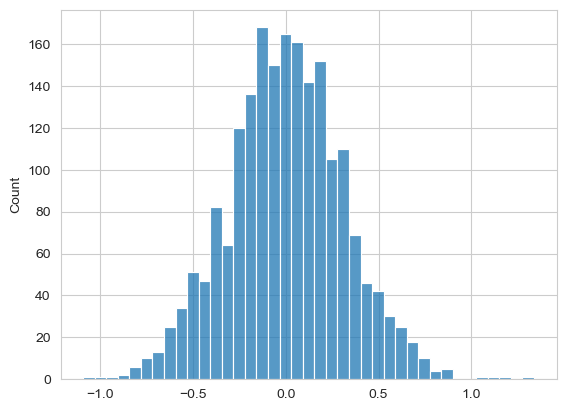

In [76]:
sns.histplot(diffs)

In [78]:
np.mean(diffs), np.std(diffs)

(0.001993445147935498, 0.31061178647471976)

The distribution of differences has values nowhere near that seen in the dataset.  The average differences is still fairly small / near 0.  The standard deviation is very close to the pooled stnadard deviation we calculated for the dataset.

#### (c) Calculate percentiles

Calculate the 90th, 95th, and 99th percentiles as well as the maximum of the distribution of differences. How do these compare to the differences calculated from the dataset? Given this, what can you say about the dataset that was examined?

In [81]:
diffs

[0.19421306503164715,
 0.4350243801476097,
 -0.5146440690140253,
 0.21229338912249318,
 -0.3582448494221637,
 -0.1302973504035947,
 0.06208672749104949,
 0.15481015605590187,
 -0.34140377744222405,
 0.34774972416059313,
 0.09252792594762127,
 0.09325674393619465,
 -0.049507016319438435,
 -0.14825033300553514,
 0.26616433573656195,
 -0.26317258409380884,
 -0.4107727694194523,
 -0.12533186982284406,
 0.08055053622820196,
 0.5034340933441683,
 -0.03996053509320063,
 -0.49833619461537637,
 -0.3040911174658163,
 0.3431103565756075,
 0.5214601372570087,
 -0.39606967376710145,
 -0.06741993560129345,
 0.027866920578475174,
 -0.21493612551924457,
 0.3753208122948024,
 0.21394459335488136,
 -0.35381727737430424,
 -0.27378740343769437,
 -0.11821460757417412,
 -0.8327375615540404,
 0.08424789217349371,
 0.0357241694649133,
 0.3444680534217639,
 -0.06122283052366129,
 0.02916923614017719,
 0.1680754269287661,
 0.09978426389704964,
 -0.10586838454358372,
 0.6491050403434997,
 0.5653497900291313,
 0.

In [83]:
np.percentile(diffs, [90, 95, 99, 100])

array([0.3878378 , 0.50946619, 0.72120271, 1.33627749])

The calculated difference from the dataset is very extreme relative to the percentiles calculated.  It implies that the data was either from different distributions and thus each distribution would have different properties (unlikely, given the genetic relationships) or that the data contained extreme values due to some other phenomenon.